# Given a two layer NN

<h2><center> $$ y = W^T σ(V^T x + b_v) + b_w $$ </center></h2>

<h4>with weight matrices and thresholds/biases given by 
    <br> $$ V^T = \left(\begin{array}{cc} -2.69 -2.80\\ -3.39 -4.56 \end{array}\right)$$ 
    <br> $$ b_v = \left(\begin{array}{cc} -2.21 \\ 4.46 \end{array}\right) $$
    <br> $$ W = \left(\begin{array}{cc} -4.91 \\ 4.95 \end{array}\right) $$
    <br> $$ b_w = -2.28 $$

For the inputs defined in the domain [−2, 2] × [−2, 2], plot the output
surface y as a function of x1, x2, when the activation function is (a) sigmoid (b) Hard limit and (c)
Radial basis function. Plot the function with with 100, 5000, 10000, sample points from the domain.</h4>

# Imports

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Definitions

In [70]:
lower_x1 = -2
upper_x1 = 2
lower_x2 = -2
upper_x2 = 2

#constants
W = np.array([[-4.91], [4.95]])
V = np.array([[-2.69, -2.80], [-3.39, -4.56]])
b_v = np.array([[-2.21], [4.46]])
b_w = -2.28

sample_points_list = [100, 5000, 10000]

# Implement Functions 

### Activation Functions

In [71]:
def sigmoid(x):
    # implemented sigmoid function with slope = -0.5
    # slope > 1 means steeper curve 
    # slove < 1 means shallow curve
    
    return 1 / (1 + np.exp(-0.5 * x))

def hard_limit(x):
    # f(x) = 1, if x >= 0
    # f(x) = 0, otherwise

    return [1 if ele >= 0 else 0 for ele in x]
    
def radial_basis(x):
    return None

### Get Random Domain Points of Sample Size

In [72]:
def generate_input(sample_size):
    # Generate random x1 and x2 points from given domain
    
    x1 = np.random.uniform(low=lower_x1, high=upper_x1, size=sample_size)
    x2 = np.random.uniform(low=lower_x2, high=upper_x2, size=sample_size)

    return x1, x2

### Neural Network Layers

In [73]:
def Layer(weight, x, bias):
    return np.matmul(np.transpose(weight), x) + bias 

# Visualization

In [74]:
def visualization(x1, x2, y, activation):
    # plot 3 sub-images for 3 different domain size

    fig = plt.figure(figsize=(16, 5))
    fig.suptitle(f'Output Surface for {activation} Activation Function', ha='center', fontsize=15)

    ax1 = fig.add_subplot(1, 3, 1, projection='3d')
    ax1.view_init(15, -15)
    ax1.scatter(x1[0], x2[0], y[0], c=y[0], cmap='coolwarm')
    ax1.set_xlabel('x1')
    ax1.set_ylabel('x2')
    ax1.set_zlabel('y')
    ax1.set_title('Sample Size 100', fontsize=15, y=-0.1)
    
    ax2 = fig.add_subplot(1, 3, 2, projection='3d')
    ax2.view_init(15, -15)
    ax2.scatter(x1[1], x2[1], y[1], c=y[1], cmap='coolwarm')
    ax2.set_xlabel('x1')
    ax2.set_ylabel('x2')
    ax2.set_zlabel('y')
    ax2.set_title('Sample Size 5000', fontsize=15, y=-0.1)
    
    ax3 = fig.add_subplot(1, 3, 3, projection='3d')
    ax3.view_init(15, -15)
    ax3.scatter(x1[2], x2[2], y[2], c=y[2], cmap='coolwarm')
    ax3.set_xlabel('x1')
    ax3.set_ylabel('x2')
    ax3.set_zlabel('y')
    ax3.set_title('Sample Size 10000', fontsize=15, y=-0.1)

    filename = f'./Images/Problem2_{activation}.pdf'
    plt.savefig(filename)

# Generate y with x1 and x2

### For Sigmoid Activation Function

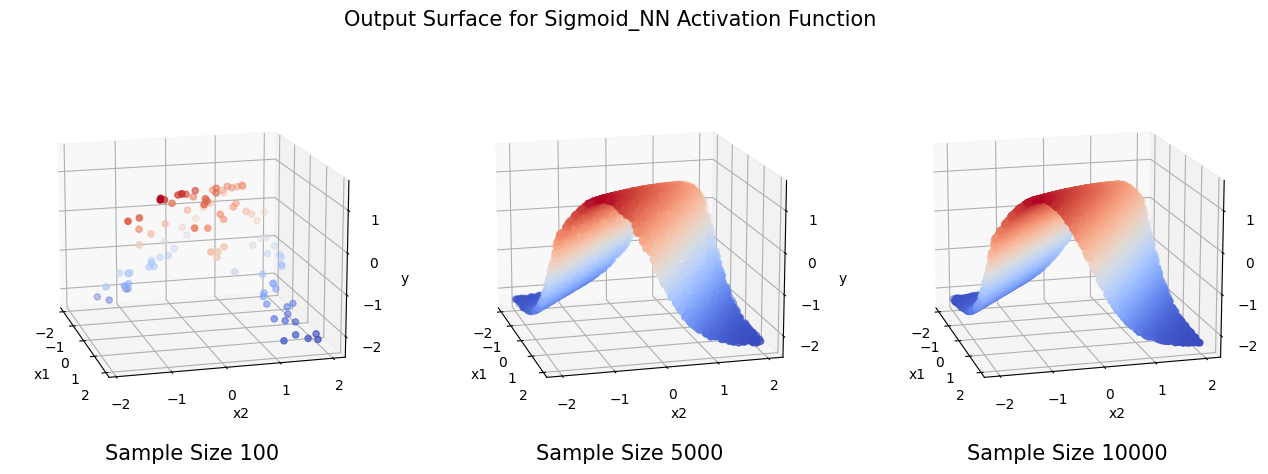

In [75]:
complete_x1 = list()
complete_x2 = list()
complete_y = list()

for sample_size in sample_points_list:
    x1, x2 =  generate_input(sample_size)

    y_list = []
    for first, second in zip(x1, x2):
        x = np.array([[first], [second]])
        y = Layer(W, sigmoid(Layer(V, x, b_v)), b_w)
        y_list.append(y)
        
    complete_x1.append(x1)
    complete_x2.append(x2)
    complete_y.append(y_list)
    
visualization(complete_x1, complete_x2, complete_y, 'Sigmoid_NN')

### For Hard Limit Activation Function

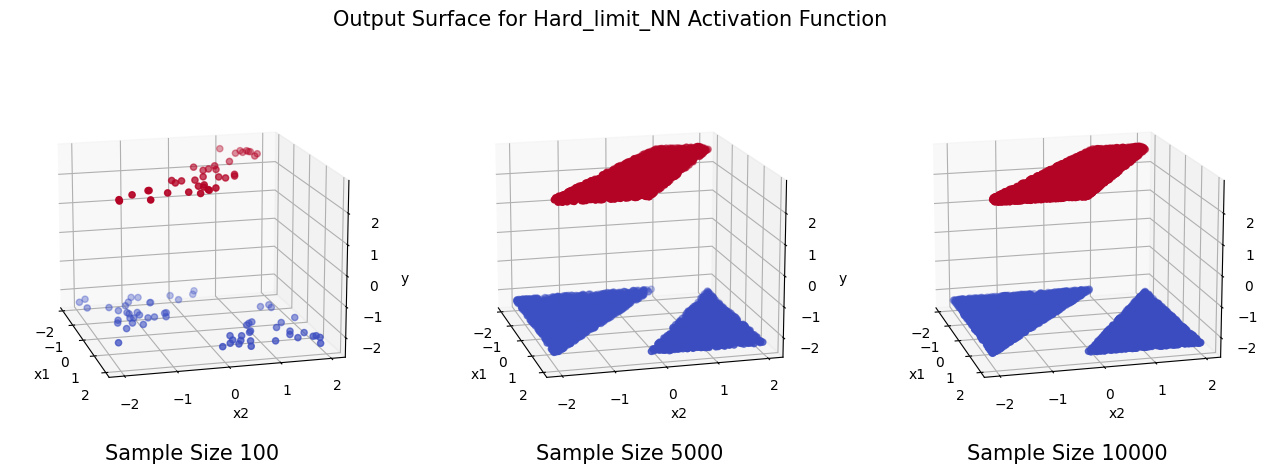

In [76]:
complete_x1 = list()
complete_x2 = list()
complete_y = list()

for sample_size in sample_points_list:
    x1, x2 =  generate_input(sample_size)

    y_list = []
    for first, second in zip(x1, x2):
        x = np.array([[first], [second]])
        y = Layer(W, hard_limit(Layer(V, x, b_v)), b_w)
        y_list.append(y)
        
    complete_x1.append(x1)
    complete_x2.append(x2)
    complete_y.append(y_list)
    
visualization(complete_x1, complete_x2, complete_y, 'Hard_limit_NN')